In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset1/dataset1.csv'
df = pd.read_csv(address)
data = df.sample(frac=1)

In [2]:
#create new data for multivariate gradient descent
data['x0']=data['x']**0
data['x2']=data['x']**2
data['x3']=data['x']**3
data['x4']=data['x']**4
data['x5']=data['x']**5
data['x6']=data['x']**6
data['x7']=data['x']**7
data['x8']=data['x']**8

#change columns for better access
newY = data.pop('y')
x0 = data.pop('x0')

data.insert(0, 'y', newY)
data.insert(1, 'x0', x0)

#insert data in arrays
y = data.iloc[:, 0].values
X = data.iloc[:, 1:10].values

YX = data.iloc[:,[0,2]].values

mainX = data.iloc[:,2].values

data.head(5)

,y,x0,x,x2,x3,x4,x5,x6,x7,x8
166,2.099942,1.0,-0.976572,0.953693,-0.931349,0.909529,-0.888221,8.674115e-01,-8.470896e-01,8.272438e-01
179,2.332728,1.0,-0.936322,0.876699,-0.820873,0.768601,-0.719659,6.738322e-01,-6.309240e-01,5.907481e-01
162,1.355131,1.0,0.444111,0.197235,0.087594,0.038902,0.017277,7.672738e-03,3.407549e-03,1.513331e-03
160,0.492350,1.0,0.394858,0.155912,0.061563,0.024309,0.009598,3.790030e-03,1.496522e-03,5.909130e-04
208,0.043009,1.0,0.073158,0.005352,0.000392,0.000029,0.000002,1.533155e-07,1.121632e-08,8.205681e-10


In [3]:
def cost_function_RMSE(X, Y, theta):
    m = len(Y)
    J = ((X.dot(theta)-Y) ** 2)/(m)
    return np.sqrt(J)

In [4]:
def normal_equation(X, Y , inLamb):
    m = len(Y)
    
    XtX =np.dot(X.T,X)
    lamb = inLamb * np.identity(len(XtX))
    XX = inv(XtX + lamb)
    
    XtY = np.dot(X.T , Y)
    
    theta = np.dot(XX , XtY)
 
    return theta

In [5]:
#60% of data for train
#40% of data for test
m = 180

X_train = X[:m]
mainX_train = X[:m , 1]
y_train = y[:m]

X_test = X[m:]
mainX_test = X[m: , 1]
y_test = y[m:]

#calculate sorted style of data

sorted_YX_train = YX[:m]
sorted_YX_test = YX[m:]

sorted_YX_train = sorted_YX_train[sorted_YX_train[:,1].argsort()]
sorted_YX_test = sorted_YX_test[sorted_YX_test[:,1].argsort()]

sorted_Y_train = sorted_YX_train[: , 0]
sorted_Y_test = sorted_YX_test[: , 0]


sorted_X_train = np.sort(mainX_train)
sorted_X_test = np.sort(mainX_test)



In [6]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

newTheta = normal_equation(X_train, y_train , 10)

# print(newTheta)

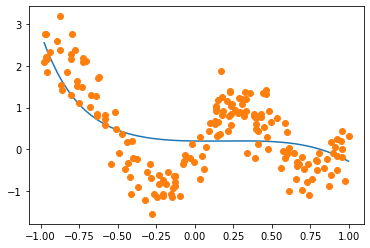

In [7]:
# plot
# sorted_X_train = mainX_train
y_predict = [None] * len(sorted_X_train)

for i in range(len(sorted_X_train)):
    y_predict[i] = newTheta[0]+ newTheta[1]*sorted_X_train[i] + newTheta[2]*(sorted_X_train[i]**2) + newTheta[3]*(sorted_X_train[i]**3) + newTheta[4]*(sorted_X_train[i]**4) + newTheta[5]*(sorted_X_train[i]**5)+ newTheta[6]*(sorted_X_train[i]**6) + newTheta[7]*(sorted_X_train[i]**7) + newTheta[8]*(sorted_X_train[i]**8)


plt.plot(sorted_X_train,y_predict)
plt.plot(mainX_train,y_train , linestyle='', marker='o')

plt.show()

In [8]:
#test
def pred(testData , Thetas):
    y_predict = [None] * len(testData)
    for i in range(len(testData)):
        y_predict[i] = Thetas[0]+ Thetas[1]*testData[i] + Thetas[2]*(testData[i]**2) + Thetas[3]*(testData[i]**3) + Thetas[4]*(testData[i]**4) + Thetas[5]*(testData[i]**5)+ Thetas[6]*(testData[i]**6) + Thetas[7]*(testData[i]**7) + Thetas[8]*(testData[i]**8)
    
    return (y_predict)

In [9]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [10]:
y_ = pred(mainX_test,newTheta)

In [11]:
r2(y_,y_test)

0.49087709829077797

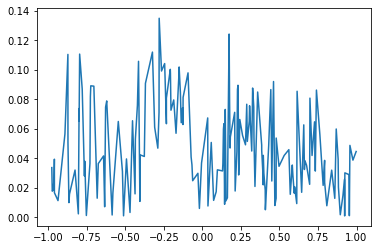

In [12]:
#cost of training data
cost = cost_function_RMSE(X_train[X_train[:,1].argsort()], sorted_Y_train, newTheta)
plt.plot(sorted_X_train,cost)
plt.show()

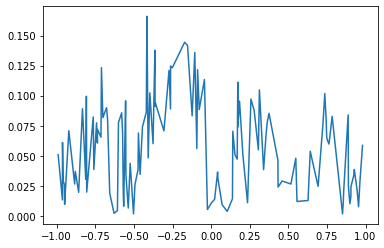

In [13]:
#cost of training data
cost = cost_function_RMSE(X_test[X_test[:,1].argsort()], sorted_Y_test, newTheta)
plt.plot(sorted_X_test,cost)
plt.show()